In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install wordcloud
from wordcloud import WordCloud

In [3]:
df = pd.read_csv('netflix1.csv')
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [4]:
df.head(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [5]:
df.tail(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV
8789,s8786,TV Show,YOM,Not Given,Pakistan,6/7/2018,2016,TV-Y7,1 Season,Kids' TV


In [6]:
df.shape

(8790, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [8]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [9]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
date_added,8790,2019-05-17 21:44:01.638225408,2008-01-01 00:00:00,2018-04-06 00:00:00,2019-07-03 00:00:00,2020-08-19 18:00:00,2021-09-25 00:00:00,NaN
release_year,8790.0,2014.183163,1925.0,2013.0,2017.0,2019.0,2021.0,8.825466


In [10]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [11]:
df.duplicated().sum()

0

- There is no null values and duplicates values are present in the dataset.
- 'date_added' column in object datatype I just convert it to 'datetime' datatype
- show_id column is no more nedded for the further analysis so I just drop the column

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.drop(['show_id'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8790 non-null   object        
 1   title         8790 non-null   object        
 2   director      8790 non-null   object        
 3   country       8790 non-null   object        
 4   date_added    8790 non-null   datetime64[ns]
 5   release_year  8790 non-null   int64         
 6   rating        8790 non-null   object        
 7   duration      8790 non-null   object        
 8   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 618.2+ KB


In [14]:
df['type'].value_counts()

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

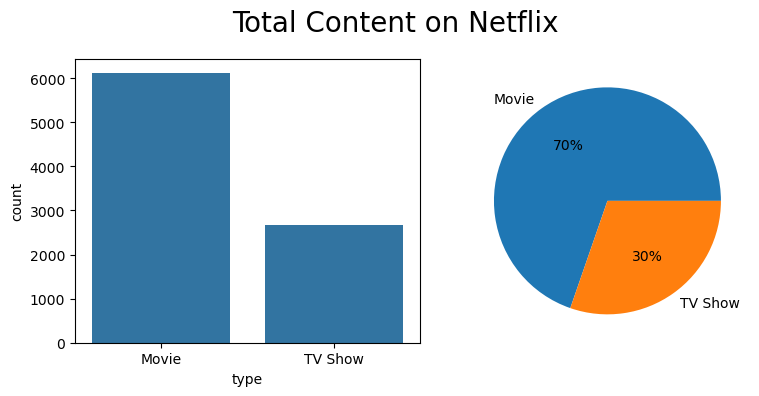

In [15]:
freq = df['type'].value_counts()
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
sns.countplot(x='type', data=df, ax=axes[0])
axes[1].pie(freq, labels=freq.index, autopct='%.0f%%')
plt.suptitle('Total Content on Netflix', fontsize=20)
plt.tight_layout()
plt.show()

In [16]:
df['rating'].value_counts()

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

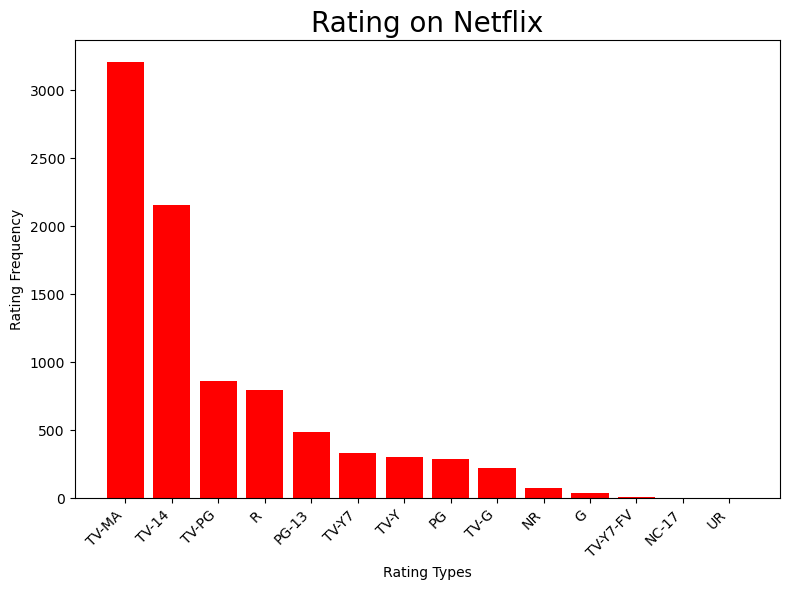

In [17]:
# Function to calculate and plot ratings
def plot_ratings(data):
    # Calculate rating counts
    ratings = df['rating'].value_counts().reset_index()
    ratings.columns = ['rating', 'count']

    # Create a bar plot
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(ratings['rating'], ratings['count'], color='red')

    # Customize the appearance
    ax.set_xticks(range(len(ratings['rating'])))
    ax.set_xticklabels(ratings['rating'], rotation=45, ha='right')
    ax.set_xlabel("Rating Types")
    ax.set_ylabel("Rating Frequency")
    ax.set_title("Rating on Netflix", fontsize=20)

    # Improve layout
    plt.tight_layout()
    plt.show()

# Call the function
plot_ratings(df)

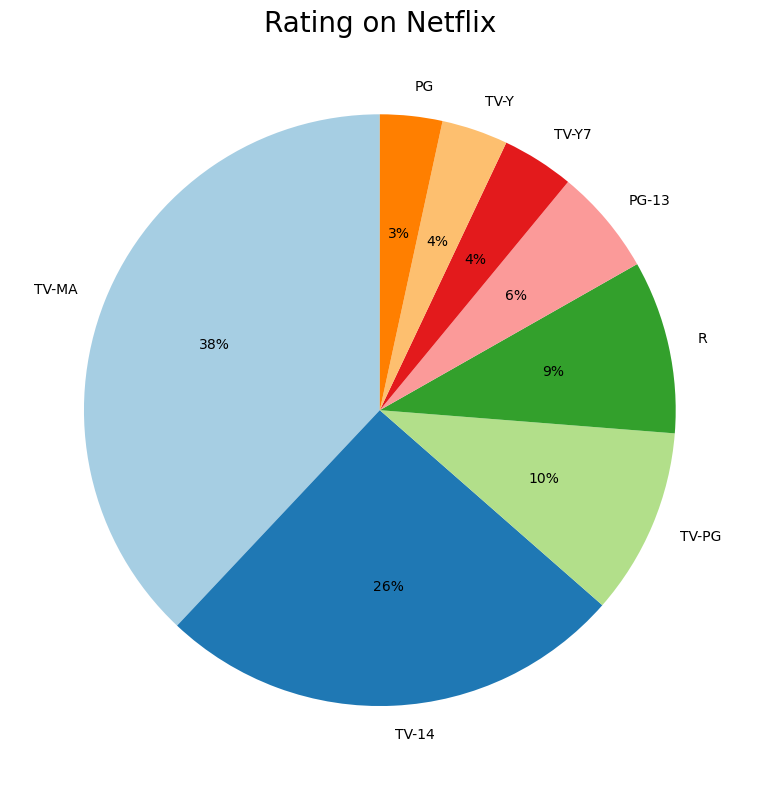

In [18]:
ratings=df['rating'].value_counts().reset_index().sort_values(by='count',
ascending=False)
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(ratings['count'][:8], 
       labels=ratings['rating'][:8], 
       autopct='%.0f%%', 
       startangle=90, 
       colors=plt.cm.Paired.colors)

# Add a title
plt.title('Rating on Netflix', fontsize=20)

# Display the plot
plt.tight_layout()
plt.show()

In [19]:
 df['country'].value_counts()

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: count, Length: 86, dtype: int64

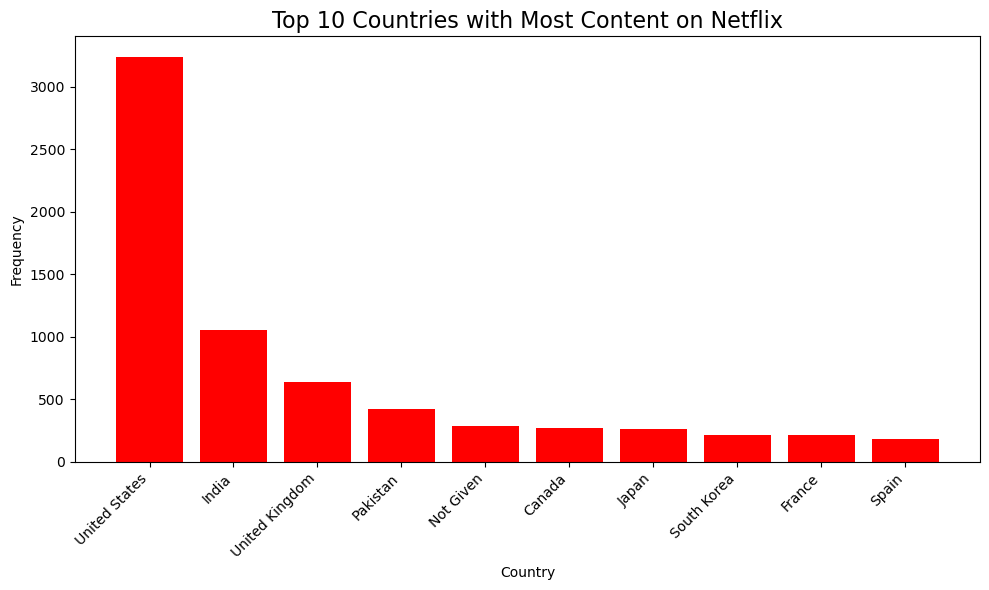

In [20]:
# Get the top 10 countries by content count
top_ten_countries = (
    df['country']
    .value_counts()
    .reset_index()
    .sort_values(by='count', ascending=False)
    .head(10)
)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_ten_countries['country'], top_ten_countries['count'], color='red')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.title("Top 10 Countries with Most Content on Netflix", fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()

In [21]:
df['year']=df['date_added'].dt.year
df['month']=df['date_added'].dt.month
df['day']=df['date_added'].dt.day

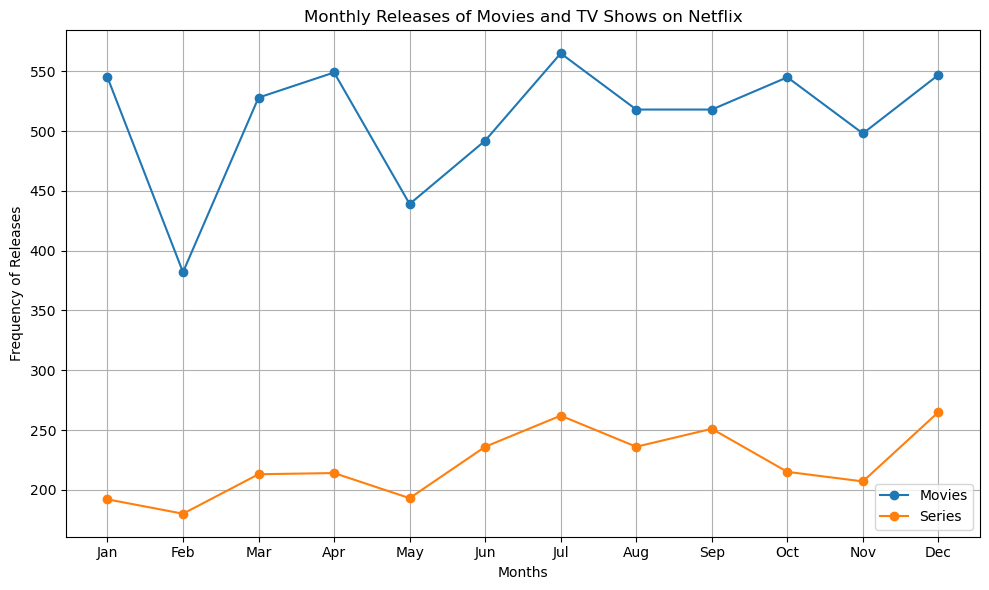

In [22]:
# Calculate monthly releases for movies and TV shows
monthly_movie_release = (
    df[df['type'] == 'Movie']['month']
    .value_counts()
    .sort_index()
)

monthly_series_release = (
    df[df['type'] == 'TV Show']['month']
    .value_counts()
    .sort_index()
)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(monthly_movie_release.index, monthly_movie_release.values, label='Movies', marker='o')
plt.plot(monthly_series_release.index, monthly_series_release.values, label='Series', marker='o')

# Customize the plot
plt.xlabel("Months")
plt.ylabel("Frequency of Releases")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Monthly Releases of Movies and TV Shows on Netflix")
plt.legend()
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

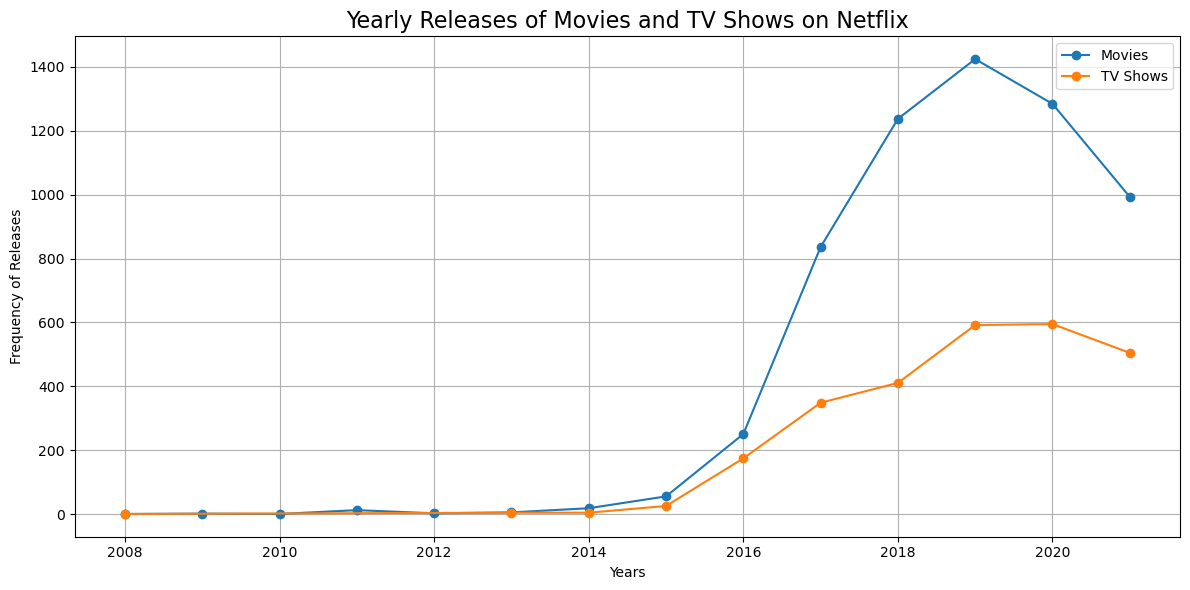

In [23]:
# Calculate yearly releases for Movies and TV Shows
yearly_movie_releases = (
    df[df['type'] == 'Movie']['year']
    .value_counts()
    .sort_index()
)

yearly_series_releases = (
    df[df['type'] == 'TV Show']['year']
    .value_counts()
    .sort_index()
)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(yearly_movie_releases.index, yearly_movie_releases.values, label='Movies', marker='o')
plt.plot(yearly_series_releases.index, yearly_series_releases.values, label='TV Shows', marker='o')

# Customize the plot
plt.xlabel("Years")
plt.ylabel("Frequency of Releases")
plt.title("Yearly Releases of Movies and TV Shows on Netflix", fontsize=16)
plt.grid(True)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

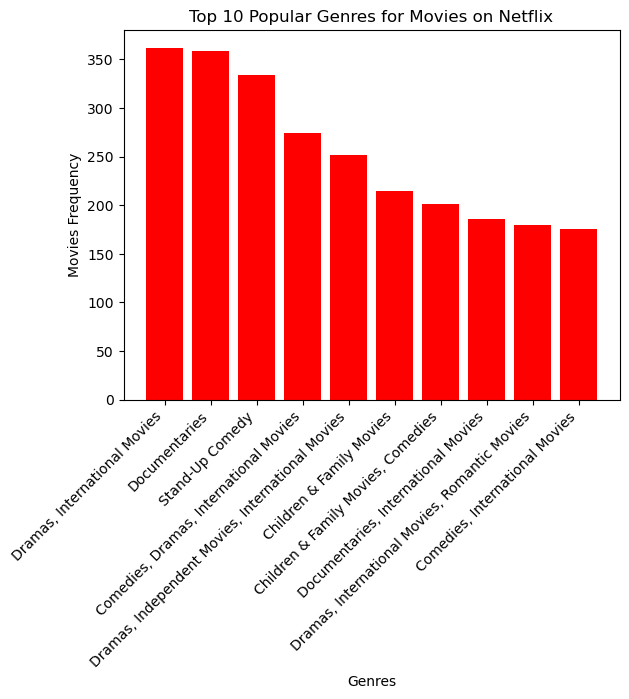

In [24]:
# Calculate the top 10 popular genres for Movies
popular_movie_genre = (
    df[df['type'] == 'Movie']
    .groupby('listed_in')
    .size()
    .sort_values(ascending=False)[:10]
)

# Calculate the top 10 popular genres for TV Shows
popular_series_genre = (
    df[df['type'] == 'TV Show']
    .groupby('listed_in')
    .size()
    .sort_values(ascending=False)[:10]
)

# Plot the top 10 genres for Movies
plt.bar(popular_movie_genre.index, popular_movie_genre.values, color='red')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("Movies Frequency")
plt.title("Top 10 Popular Genres for Movies on Netflix")
plt.show()

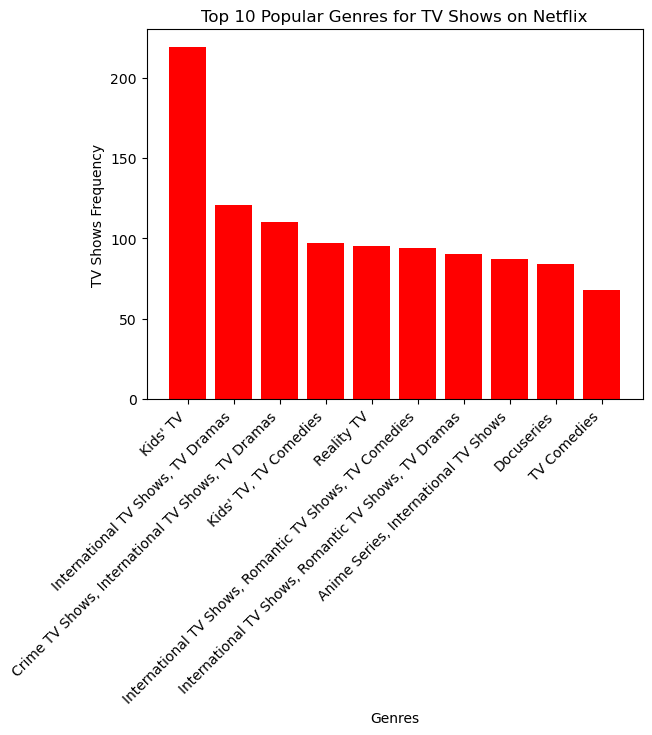

In [25]:
# Plot the top 10 genres for TV Shows
plt.bar(popular_series_genre.index, popular_series_genre.values, color='red')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("TV Shows Frequency")
plt.title("Top 10 Popular Genres for TV Shows on Netflix")
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Rajiv Chilaka'),
  Text(1, 0, 'Alastair Fothergill'),
  Text(2, 0, 'Raúl Campos, Jan Suter'),
  Text(3, 0, 'Suhas Kadav'),
  Text(4, 0, 'Marcus Raboy'),
  Text(5, 0, 'Jay Karas'),
  Text(6, 0, 'Cathy Garcia-Molina'),
  Text(7, 0, 'Youssef Chahine'),
  Text(8, 0, 'Jay Chapman'),
  Text(9, 0, 'Martin Scorsese'),
  Text(10, 0, 'Steven Spielberg'),
  Text(11, 0, 'Mark Thornton, Todd Kauffman'),
  Text(12, 0, 'Don Michael Paul'),
  Text(13, 0, 'David Dhawan')])

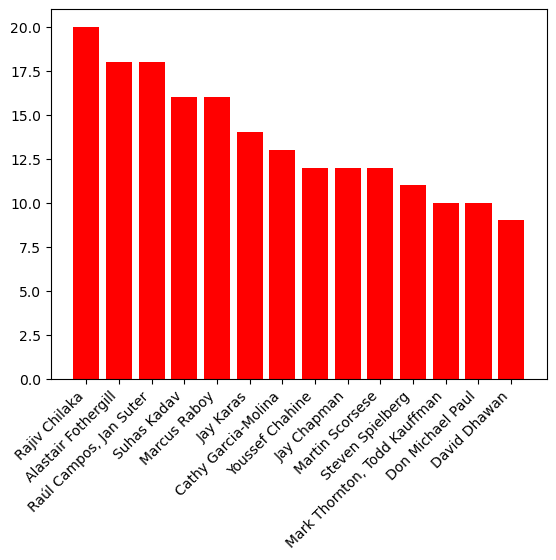

In [26]:
# Get the top directors excluding the most frequent one
directors = (
    df['director']
    .value_counts()
    .reset_index()
    .sort_values(by='count', ascending=False)[1:15]
)

# Plot the top directors
plt.bar(directors['director'], directors['count'], color='red')
plt.xticks(rotation=45, ha='right')

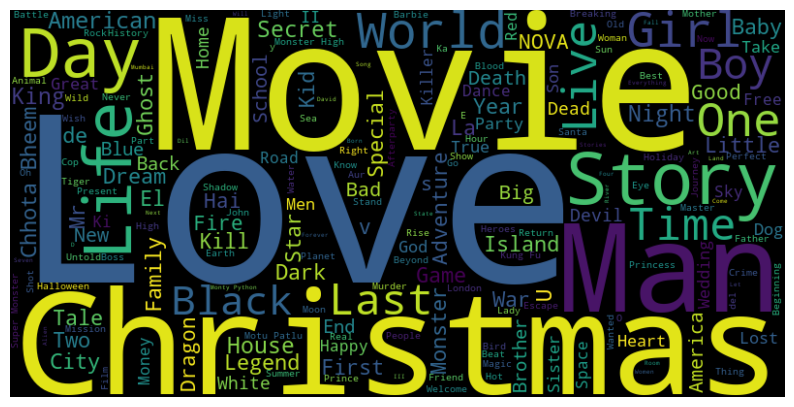

In [27]:
# Filter movie titles from the dataset
movie_titles = df.loc[df['type'] == 'Movie', 'title']

# Generate a word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='black'
).generate(' '.join(movie_titles))

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()